In [1]:
# Sum numbers 1..N
total = 0
for i in range(1, 11):
    total += i
print(total)

55


#### Collections = Built-in data structures used to store and manage data.
| Type           | Description                     | Example                       | Mutability |
| -------------- | ------------------------------- | ----------------------------- | ---------- |
| **List**       | Ordered, dynamic collection     | `[1, 2, 3]`                   | Mutable    |
| **Tuple**      | Ordered, fixed collection       | `(1, 2, 3)`                   | Immutable  |
| **Set**        | Unordered, unique elements only | `{1, 2, 3}`                   | Mutable    |
| **Dictionary** | Key-value pairs                 | `{"name": "Amit", "age": 30}` | Mutable    |



In [ ]:
emp = {"name": "Amit", "salary": 950000}
print(emp["name"])
emp["city"] = "Bangalore"
print(f"Employee:{emp}")

##### Where used in Data Science?

- dictionaries store configuration, column mappings

- lists store datasets, column names

- sets remove duplicates

- tuples used for fixed value returns (e.g., model parameters)

In [ ]:
# Filtering with comprehension
even_nums = [x for x in range(1, 11) if x % 2 == 0]
print(even_nums)


# Used in ML for

# - filtering rows/records

# - feature transformations

# - small ETL operations

In [ ]:
# Using Lambda with map() and filter()
nums = [2, 4, 6, 7, 9, 12]

evens = list(filter(lambda x: x % 2 == 0, nums))
odd = list(filter(lambda x : x % 2 != 0, nums))
doubles = list(map(lambda x: x*2, nums))

print(evens)
print(odd)
print(doubles)

#### 🧮 NumPy (Numerical Computing)
 Key concepts:

- N-dimensional array (ndarray)

- vectorized operations

- broadcasting (operate arrays of different shapes)

- matrix computation for ML

In [ ]:
import numpy as np

arr = np.array([1, 2, 3])
print(arr * 10)  # vectorized

#### 🧾 Pandas (Data Analysis & ETL)

Key concepts:
| Feature    | Description          |
| ---------- | -------------------- |
| DataFrame  | Table-like structure |
| Series     | Single column        |
| groupby    | Aggregations         |
| merge/join | Combine datasets     |


In [ ]:
import pandas as pd
import os

print("Current working directory is:", os.getcwd())


df = pd.read_csv("./employee_salary.csv")
print("Dataset Loaded Successfully!\n")
df.head()

# Check column types
print(df.dtypes)
# Check for missing values 
print("\nMissing Values per Column:") 
print(df.isna().sum())  # check missing values

# Convert numeric columns to numeric types (in case of issues) 
df['base_salary'] = pd.to_numeric(df['base_salary'], errors='coerce') 
df['bonus'] = pd.to_numeric(df['bonus'], errors='coerce') 
df['experience_years'] = pd.to_numeric(df['experience_years'], errors='coerce')

# Fill NaN values with 0 
df = df.fillna(0)

print("\nAfter Conversion and Filling NaN:")
print(df.isna().sum())

# Overall statistics
print("\n--- Overall Statistics ---") 
print(df.describe()) 
# Total Compensation 
df['total_compensation'] = df['base_salary'] + df['bonus'] 
print("\nSample with Total Compensation:") 
print(df[['name','department','total_compensation']].head())

In [ ]:
# Grouping & Aggregation

# Average total compensation per department
avg_by_dept = df.groupby('department')['total_compensation'].mean() 
print("\nAverage Total Compensation by Department:") 
print(avg_by_dept) 

# Highest Paid Employee 
highest_paid = df.loc[df['total_compensation'].idxmax()] 
print("\nHighest Paid Employee:") 
print(highest_paid[['employee_id','name','department','total_compensation']])

In [55]:
# Filtering / Derived Insights

# Employees with >5 years experience 
experienced = df[df['experience_years'] > 5] 
print("\nEmployees with >5 years experience:") 
print(experienced[['name','department','experience_years','total_compensation']])



Employees with >5 years experience:
      name   department  experience_years  total_compensation
2    Rahul      Finance                 7            820000.0
3     Neha  Engineering                 6           1170000.0
5   Ritesh      Finance                 9           1340000.0
7    Arjun      Product                 8           1400000.0
9   Manish      Finance                10           1570000.0
11  Vikram      Product                 6           1210000.0
13  Shreya           HR                 7            965000.0
14  Deepak  Engineering                11           1600000.0


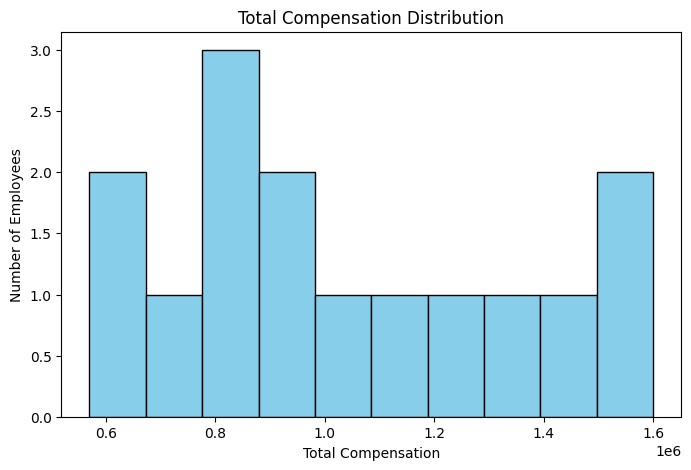

/var/folders/qy/_xt49p1x5192wd97_rybgjkw0000gn/T/ipykernel_22235/3835240507.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_by_dept.index, y=avg_by_dept.values, palette='viridis')


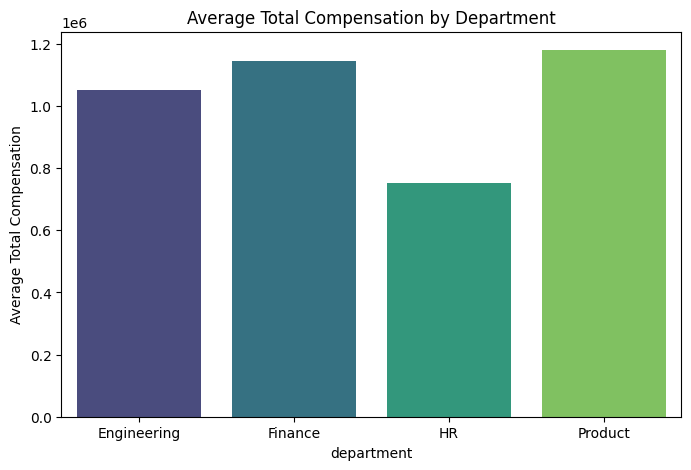

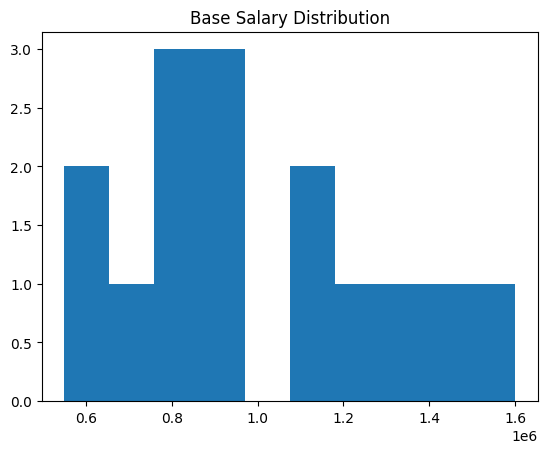

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visualization

# Histogram of total compensation
plt.figure(figsize=(8,5))
plt.hist(df['total_compensation'], bins=10, color='skyblue', edgecolor='black')
plt.title("Total Compensation Distribution")
plt.xlabel("Total Compensation")
plt.ylabel("Number of Employees")
plt.show()

# Bar plot of average salary by department
plt.figure(figsize=(8,5))
sns.barplot(x=avg_by_dept.index, y=avg_by_dept.values, palette='viridis')
plt.title("Average Total Compensation by Department")
plt.ylabel("Average Total Compensation")
plt.show()
plt.hist(df['base_salary'])
plt.title("Base Salary Distribution")
plt.show()

#### 🤖 scikit-learn (Machine Learning Library)

ML process:

- Load data
- Train / test split
- Train model
- Predict
- Evaluate

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['experience_years', 'bonus']]
y = df['base_salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

#### 🎯 Summary Table

| Concept        | Why Important                  | Usefulness in ML       |
| -------------- | ------------------------------ | ---------------------- |
| Collections    | Data structures                | Preprocessing          |
| Comprehensions | Fast, clean transformation     | Feature engineering    |
| Lambda         | Short transformation functions | map/filter on features |
| NumPy          | math & vectors                 | ML model inputs        |
| Pandas         | ETL & data preparation         | 80% of ML work         |
| Matplotlib     | visualization                  | EDA                    |
| scikit-learn   | ML algorithms                  | model building         |
